In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the file

In [2]:
telco=pd.read_excel('Telco-Customer-Churn.xlsx')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Comparing churn count gender wise

In [9]:
churned_customers=telco[telco['Churn']=='Yes']
len (churned_customers.index)

1869

In [14]:
print('Number of male churned customers- ',len (churned_customers[churned_customers['gender']=='Male'].index))
print('Number of Female churned customers- ',len (churned_customers[churned_customers['gender']=='Female'].index))

Number of male churned customers-  930
Number of Female churned customers-  939


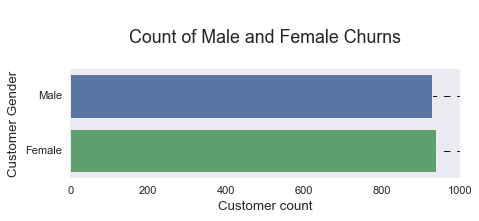

In [128]:
sns.catplot(y=churned_customers['gender'],data=churned_customers, kind="count",
                height=2, aspect=3,linewidth=.9)
plt.title('\nCount of Male and Female Churns\n',fontsize=16)
plt.ylabel('Customer Gender',fontsize=12)
plt.xlabel('Customer count',fontsize=12)
plt.grid(linestyle='--',linewidth=.8,color='black')
plt.style.use('bmh')

# Find out how many female senior citizens there in the dataset 

In [60]:
x=telco[telco['gender']=='Female']
print('number of female senior citizens in the dataset- ',x['SeniorCitizen'].sum())

number of female senior citizens in the dataset-  568


#  Compare 'tenure' with 'Total Charges' 

In [61]:
telco['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [62]:
telco['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [64]:
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors = 'coerce')
#If 'coerce', then invalid parsing will be set as NaN.

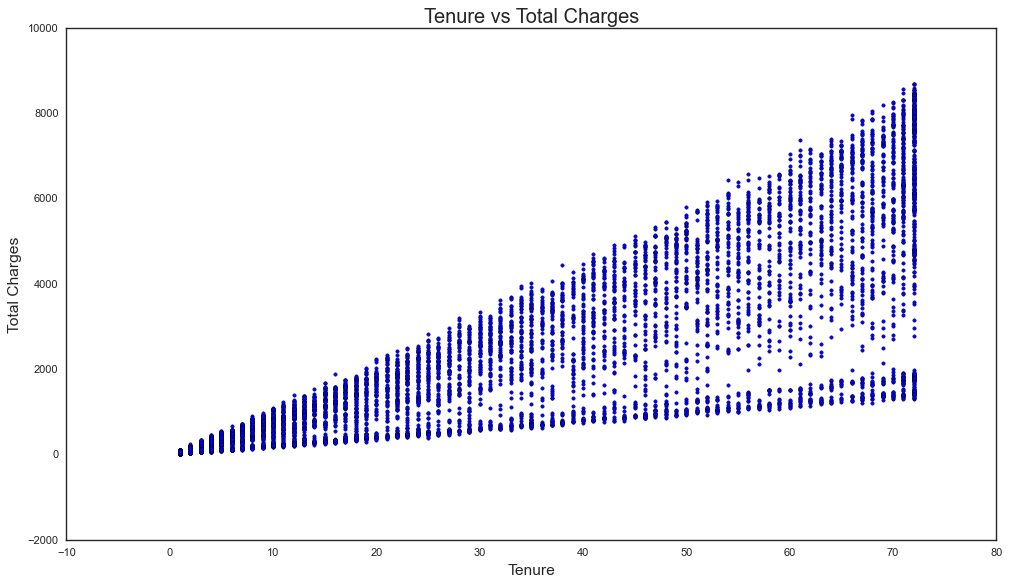

In [72]:
y=telco['TotalCharges']
x=telco['tenure']
plt.figure(figsize=(15,8))
plt.title('Tenure vs Total Charges',fontsize=18)
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('Total Charges',fontsize=14)
plt.scatter(x,y,s=10)

# Find out which contract preffered by the senior citizen

In [81]:
senior_citizens=telco[telco['SeniorCitizen']==1]
senior_citizens

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


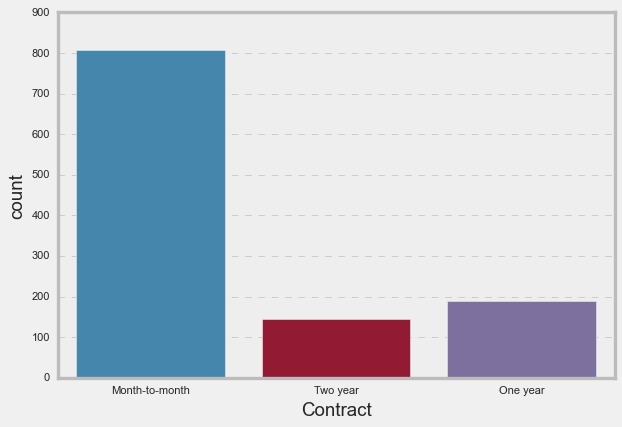

In [118]:
sns.countplot(senior_citizens["Contract"])
plt.style.use('bmh')

In [ ]:
#Month to month contract is preffered by the senior citizen

#  Comment your finds on Payment Method?

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


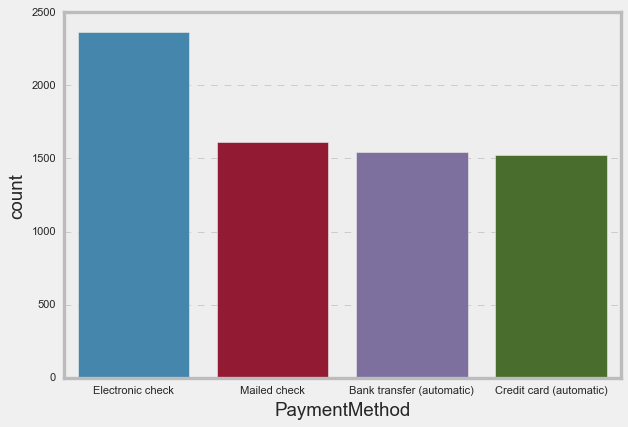

In [117]:
sns.countplot(telco["PaymentMethod"])
plt.style.use('bmh')

In [ ]:
#Most people are preferring Electronic check for payment and least are choosing Credit card. 


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


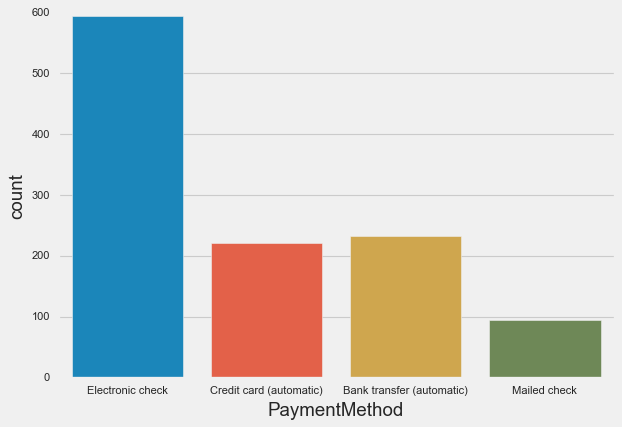

In [110]:
sns.countplot(senior_citizens["PaymentMethod"])
len (senior_citizens.index)
plt.style.use('bmh')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


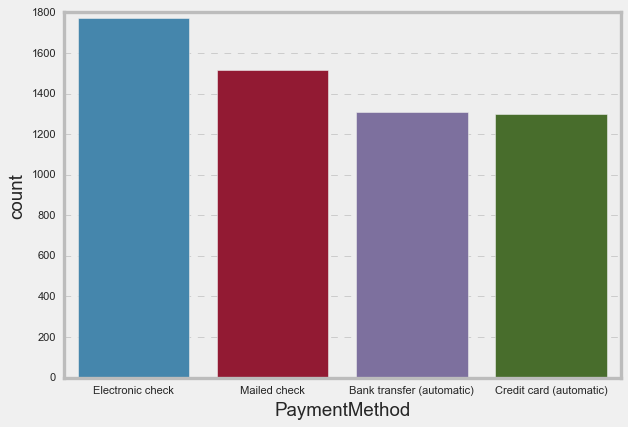

In [111]:
young_citizens=telco[telco['SeniorCitizen']==0]
sns.countplot(young_citizens["PaymentMethod"])
plt.style.use('bmh')


In [ ]:
#Most people are preferring Electronic check for payment and least are choosing Credit card. 
#More percentage of the senior citizens are choosing electronic check compared to others

In [115]:
payment = telco.groupby("PaymentMethod")
payment.first()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
PaymentMethod,,,,,,,,,,,,,,,,,,,,
Bank transfer (automatic),7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
Credit card (automatic),1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,89.10,1949.40,No
Electronic check,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
Mailed check,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,No


In [116]:
payment['gender'].value_counts()

PaymentMethod              gender
Bank transfer (automatic)  Female     788
                           Male       756
Credit card (automatic)    Male       770
                           Female     752
Electronic check           Male      1195
                           Female    1170
Mailed check               Male       834
                           Female     778
Name: gender, dtype: int64

In [ ]:
#All the modes of payment are chosen irrespective of the gender of the customer, although a noticable surge of Females are seen in Mailed check only